In [1]:
from matplotlib.patches import ConnectionPatch
import matplotlib.pyplot as plt
import numpy as np
import scipy.spatial.distance as dist

In [2]:
def dp(dist_mat):
   

    N, M = dist_mat.shape
    
    
    cost_mat = np.zeros((N + 1, M + 1))
    for i in range(1, N + 1):
        cost_mat[i, 0] = np.inf
    for i in range(1, M + 1):
        cost_mat[0, i] = np.inf

   
    traceback_mat = np.zeros((N, M))
    for i in range(N):
        for j in range(M):
            penalty = [
                cost_mat[i, j],      # match (0)
                cost_mat[i, j + 1],  # insertion (1)
                cost_mat[i + 1, j]]  # deletion (2)
            i_penalty = np.argmin(penalty)
            cost_mat[i + 1, j + 1] = dist_mat[i, j] + penalty[i_penalty]
            traceback_mat[i, j] = i_penalty

    i = N - 1
    j = M - 1
    path = [(i, j)]
    while i > 0 or j > 0:
        tb_type = traceback_mat[i, j]
        if tb_type == 0:
            
            i = i - 1
            j = j - 1
        elif tb_type == 1:
           
            i = i - 1
        elif tb_type == 2:
           
            j = j - 1
        path.append((i, j))

   
    cost_mat = cost_mat[1:, 1:]#removing infinite edged
    return (path[::-1], cost_mat)#changing path from (N,M)->(0,0)  to (0,0)->(N,M)

(0.7, 7.3, -1.75, 3.75)

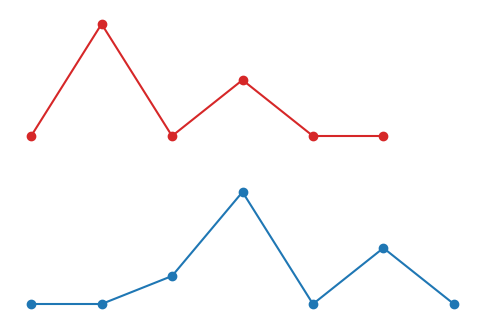

In [3]:
x = np.array([0, 2, 0, 1, 0, 0])
y = np.array([0, 0, 0.5, 2, 0, 1, 0])

plt.figure(figsize=(6, 4))
plt.plot(np.arange(x.shape[0]) + 1, x + 1.5, "-o", c="C3")
plt.plot(np.arange(y.shape[0]) + 1, y - 1.5, "-o", c="C0")
plt.axis("off")

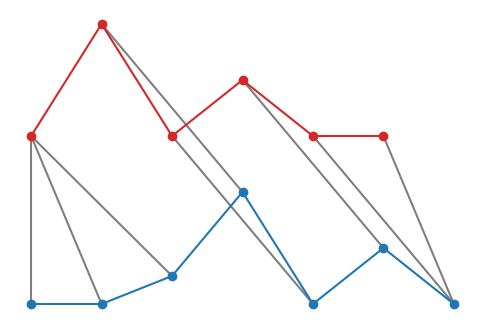

In [4]:
N = x.shape[0]
M = y.shape[0]
dist_mat = np.zeros((N, M))
for i in range(N):
    for j in range(M):
        dist_mat[i, j] = abs(x[i] - y[j])


path, cost_mat = dp(dist_mat)


plt.figure(figsize=(6, 4))
for x_i, y_j in path:
    plt.plot([x_i, y_j], [x[x_i] + 1.5, y[y_j] - 1.5], c="C7")
plt.plot(np.arange(x.shape[0]), x + 1.5, "-o", c="C3")
plt.plot(np.arange(y.shape[0]), y - 1.5, "-o", c="C0")
plt.axis("off");

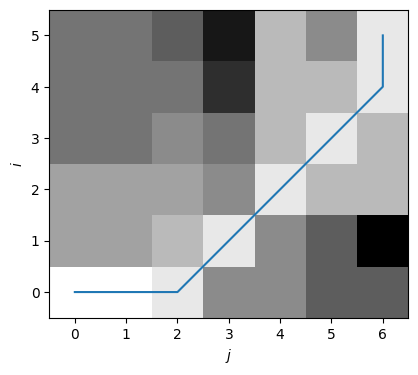

In [5]:
plt.figure(figsize=(6, 4))
plt.imshow(cost_mat, cmap=plt.cm.binary, interpolation="nearest", origin="lower")
x_path, y_path = zip(*path)
plt.plot(y_path, x_path)
plt.xlabel("$j$")
plt.ylabel("$i$");